### This notebook recreates all the plots and visualizations from the paper
No training is performed in this Notebook

Including Tools directory to the current working path

In [1]:
import sys
sys.path.insert(0, '../Tools')

Including required tools

In [2]:
import data_prep
import model_tools
import visualizing_tools
import evaluation_tools

Using TensorFlow backend.
/anaconda2/envs/envPython3TF1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda2/envs/envPython3TF1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda2/envs/envPython3TF1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda2/envs/envPython3TF1/lib/p

Importing required packages

In [3]:
import os
import numpy as np
import pandas as pd
import keras
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline

Set the GPU to Use

In [4]:
GPU_NO="0"
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list = GPU_NO
set_session(tf.Session(config=config))

##### Loading MNIST and Letters Datasets

In [5]:
mnist=data_prep.mnist_data_prep()
letters=data_prep.letters_prep()

In init of mnist_data_prep
In init of letters_prep


Create Results directory if they do not exist

In [6]:
if not os.path.exists('LeNet++/Final_Plots'):
    os.makedirs('LeNet++/Final_Plots')
if not os.path.exists('LeNet++/DIRs'):
    os.makedirs('LeNet++/DIRs')

The following functions performs all the plotting and storing the classification scores in a text file to be later read for DIR plotting

In [7]:
def analyze(model,pos_x=mnist.X_test,pos_y=mnist.labels_test,neg=letters.X_test,file_name='Vanilla_{}.{}',neg_labels='Not_MNIST'):
    mnist_intermediate_output=model_tools.extract_features(model,pos_x,layer_name=['fc','softmax','pred'])
    if neg is not None:
        neg_intermediate_output=model_tools.extract_features(model,neg,layer_name=['fc','softmax','pred'])
    pred_weights=model.get_layer('pred').get_weights()[0]
    
    visualizing_tools.plotter_2D(
                                    mnist_intermediate_output[0],
                                    pos_y,
                                    neg_intermediate_output[0],
                                    final=True,
                                    file_name='LeNet++/Final_Plots/'+file_name,
                                    pos_labels='MNIST Digits',
                                    neg_labels=neg_labels,
                                    pred_weights=pred_weights
                                )
    
    visualizing_tools.plot_softmax_histogram(
                                                mnist_intermediate_output[1],
                                                neg_intermediate_output[1],
                                                file_name='LeNet++/Final_Plots/'+file_name,
                                                pos_labels='MNIST Digits',
                                                neg_labels=neg_labels
                                            )
    gt_y = np.concatenate((mnist.labels_test,np.ones(neg_intermediate_output[1].shape[0])*10),axis=0)
    pred_y = np.concatenate((mnist_intermediate_output[1],neg_intermediate_output[1]),axis=0)
    evaluation_tools.write_file_for_DIR(gt_y,
                                        pred_y,
                                        file_name=('LeNet++/DIRs/'+file_name).format(neg_labels,'txt'),
                                        num_of_known_classes=10
                                       )
    evaluation_tools.write_file_for_DIR(gt_y,
                                        pred_y,
                                        file_name=('LeNet++/DIRs/'+file_name).format(neg_labels,'txt'),
                                        feature_vector=np.concatenate((mnist_intermediate_output[0],neg_intermediate_output[0])),
                                        num_of_known_classes=10
                                       )

#### Plotting DIR curves as seen in the paper

In [8]:
def evaluation_plotter(dataset_type,random_model_no='0'):
    evaluation_tools.process_files(DIR_filename='LeNet++/Final_Plots/'+dataset_type+'/DIR_Unknowns_'+random_model_no,
                                   files_to_process=[
                                                        'LeNet++/DIRs/'+dataset_type+'/Vanilla_'+random_model_no+'_'+dataset_type+'.txt',
                                                        'LeNet++/DIRs/'+dataset_type+'/BG_'+random_model_no+'_'+dataset_type+'.txt',
                                                        'LeNet++/DIRs/'+dataset_type+'/Cross_'+random_model_no+'_'+dataset_type+'.txt',
                                                        'LeNet++/DIRs/'+dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_'+dataset_type+'.txt',
                                                    ],
                                   labels=['SoftMax','Background','Entropic OpenSet Loss','ObjectSphere'],
                                   out_of_plot=True
                                )

### Using Not MNIST

Loading Dataset

In [9]:
not_mnist=data_prep.NOT_MNIST()

In [10]:
random_model_no='0'
dataset_type='Not_MNIST'
if not os.path.exists('LeNet++/Final_Plots/'+dataset_type):
    os.makedirs('LeNet++/Final_Plots/'+dataset_type)
if not os.path.exists('LeNet++/DIRs/'+dataset_type):
    os.makedirs('LeNet++/DIRs/'+dataset_type)

##### Network Trained with only MNIST Samples

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


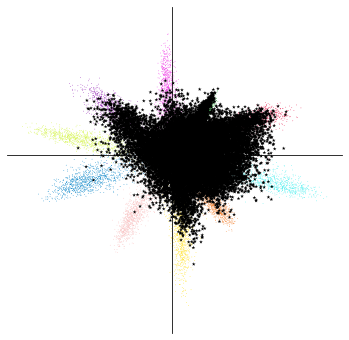

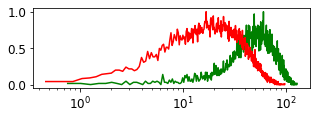

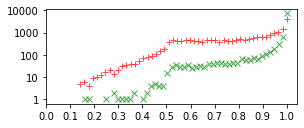

DIR score file saved at LeNet++/DIRs/Not_MNIST/Multiplying_with_mag_Vanilla_0_Not_MNIST.txt


In [11]:
vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
analyze(vanilla_lenet_pp,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}')

##### Network Trained with Letters as Background Class

In [12]:
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}')

##### Entropic OpenSet

Raw MNIST trained with Letters Samples as negatives (CrossEntropy Label for negatives = 0.1)

In [13]:
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}')

##### ObjectoSphere Loss

#### Prerequisites for Testing Objectosphere

In [14]:
from keras.layers import Input

In [15]:
Minimum_mag_for_knowns=50.
#random_model_no = '0'

In [16]:
def ring_loss(y_true,y_pred):
    pred=K.sqrt(K.sum(K.square(y_pred),axis=1))
    error=K.mean(K.square(
        # Loss for Knowns having magnitude greater than knownsMinimumMag
        y_true[:,0]*(K.maximum(knownsMinimumMag-pred,0.))
        # Add two losses
        +
        # Loss for unKnowns having magnitude greater than unknownsMaximumMag
        y_true[:,1]*(pred)
    ))
    return error
X_train,Y_train,sample_weights,Y_pred_with_flags=model_tools.concatenate_training_data(mnist,letters.X_train,0.1,ring_loss=True)
knownsMinimumMag = Input((1,), dtype='float32', name='knownsMinimumMag')
knownsMinimumMag_ = np.ones((X_train.shape[0]))*Minimum_mag_for_knowns

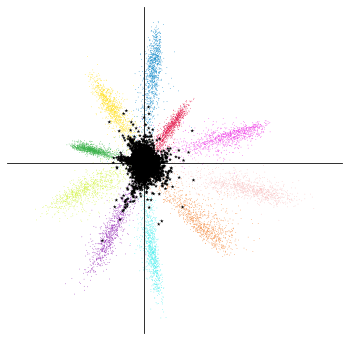

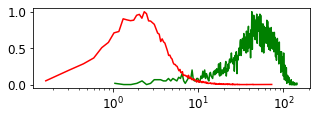

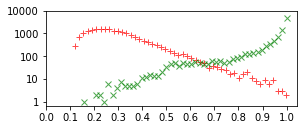

DIR score file saved at LeNet++/DIRs/Not_MNIST/Multiplying_with_mag_Ring_50.0_0_Not_MNIST.txt


In [17]:
Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')

#### Center-Loss

##### Prerequisites for Testing Center-Loss

In [18]:
from keras.engine.topology import Layer

def ring_loss(y_true,y_pred):
    pred=K.sqrt(K.sum(K.square(y_pred),axis=1))
    error=K.mean(K.square(
        # Loss for Knowns having magnitude greater than knownsMinimumMag
        y_true[:,0]*(K.maximum(knownsMinimumMag-pred,0.))
        # Add two losses
        +
        # Loss for unKnowns having magnitude greater than unknownsMaximumMag
        y_true[:,1]*(pred)
    ))
    return error

### prelu

def prelu(x, name='default'):
    if name == 'default':
        return PReLU(alpha_initializer=initializers.Constant(value=0.25))(x)
    else:
        return PReLU(alpha_initializer=initializers.Constant(value=0.25), name=name)(x)


### special layer

class CenterLossLayer(Layer):

    def __init__(self, alpha=0.5, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(10, 2),
                                       initializer='uniform',
                                       trainable=False)
        # self.counter = self.add_weight(name='counter',
        #                                shape=(1,),
        #                                initializer='zeros',
        #                                trainable=False)  # just for debugging
        super().build(input_shape)

    def call(self, x, mask=None):

        # x[0] is Nx2, x[1] is Nx10 onehot, self.centers is 10x2
        delta_centers = K.dot(K.transpose(x[1]), (K.dot(x[1], self.centers) - x[0]))  # 10x2
        center_counts = K.sum(K.transpose(x[1]), axis=1, keepdims=True) + 1  # 10x1
        delta_centers /= center_counts
        new_centers = self.centers - self.alpha * delta_centers
        self.add_update((self.centers, new_centers), x)

        # self.add_update((self.counter, self.counter + 1), x)

        self.result = x[0] - K.dot(x[1], self.centers)
        self.result = K.sum(self.result ** 2, axis=1, keepdims=True) #/ K.dot(x[1], center_counts)
        return self.result # Nx1

    def compute_output_shape(self, input_shape):
        return K.int_shape(self.result)


### custom loss

def zero_loss(y_true, y_pred):
    return 0.5 * K.sum(y_pred, axis=0)

X_train,Y_train,sample_weights,Y_pred_with_flags=model_tools.concatenate_training_data(mnist,letters.X_train,0.1,ring_loss=True)
knownsMinimumMag = Input((1,), dtype='float32', name='knownsMinimumMag')
knownsMinimumMag_ = np.ones((X_train.shape[0]))*Minimum_mag_for_knowns

aux_input = Input((10,), dtype='float32', name='aux_input')
aux_input_ = np.array(Y_train)

dummy1 = np.zeros((X_train.shape[0]))
dummy2 = np.zeros((mnist.X_val.shape[0]))

In [19]:
#Mag= np.ones((mnist.X_test.shape[0]))*Minimum_mag_for_knowns,
from keras.utils.np_utils import to_categorical
def analyze2(model,pos_x=mnist.X_test,pos_y=mnist.labels_test,neg=letters.X_test,neg_lab=letters.Y_test,file_name='Vanilla_{}.{}',neg_labels='Not_MNIST'):
    mnist_intermediate_output=model_tools.extract_features2(model,[pos_x,to_categorical(pos_y,10)],layer_name=['fc','softmax','pred'])
    
    if neg is not None:
        dummyArray = to_categorical(np.zeros(neg_lab.shape[0]),10)
        neg_intermediate_output=model_tools.extract_features2(model,[neg,dummyArray],layer_name=['fc','softmax','pred'])
    pred_weights=model.get_layer('pred').get_weights()[0]
    
    visualizing_tools.plotter_2D(
                                    mnist_intermediate_output[0],
                                    pos_y,
                                    neg_intermediate_output[0],
                                    final=True,
                                    file_name='LeNet++/Final_Plots/'+file_name,
                                    pos_labels='MNIST Digits',
                                    neg_labels=neg_labels,
                                    pred_weights=pred_weights
                                )
    
    visualizing_tools.plot_softmax_histogram(
                                                mnist_intermediate_output[1],
                                                neg_intermediate_output[1],
                                                file_name='LeNet++/Final_Plots/'+file_name,
                                                pos_labels='MNIST Digits',
                                                neg_labels=neg_labels
                                            )
    
    gt_y = np.concatenate((mnist.labels_test,np.ones(neg_intermediate_output[1].shape[0])*10),axis=0)
    pred_y = np.concatenate((mnist_intermediate_output[1],neg_intermediate_output[1]),axis=0)
    
    evaluation_tools.write_file_for_DIR(gt_y,
                                        pred_y,
                                        file_name=('LeNet++/DIRs/'+file_name).format(neg_labels,'txt'),
                                        num_of_known_classes=10
                                       )
    
    evaluation_tools.write_file_for_DIR(gt_y,
                                        pred_y,
                                        file_name=('LeNet++/DIRs/'+file_name).format(neg_labels,'txt'),
                                        feature_vector=np.concatenate((mnist_intermediate_output[0],neg_intermediate_output[0])),
                                        num_of_known_classes=10
                                       )
    
    

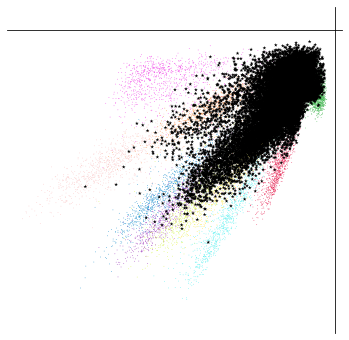

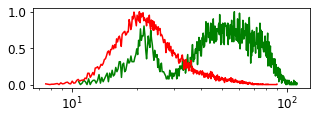

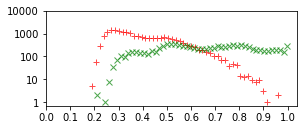

DIR score file saved at LeNet++/DIRs/Not_MNIST/Multiplying_with_mag_Center_50.0_0_Not_MNIST.txt


In [20]:
Center_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Center_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss, 'CenterLossLayer': CenterLossLayer, 'zero_loss': zero_loss})
#Center_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Center_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no))
analyze2(Center_Loss_Lenet_pp,file_name=dataset_type+'/Center_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')

In [21]:
#evaluation_plotter(dataset_type,'0')

#### Testing with other Random Model Weight Initialization

In [22]:

#random_model_no='1'
#vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
#analyze(vanilla_lenet_pp,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}')
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}')
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}')
#Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
#analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')


In [23]:
#evaluation_plotter(dataset_type,'1')

In [24]:
#random_model_no='2'
#vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
#analyze(vanilla_lenet_pp,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}')
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}')
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}')
#Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
#analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')

In [25]:
#evaluation_plotter(dataset_type,'2')

In [26]:
#random_model_no='3'
#vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
#analyze(vanilla_lenet_pp,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}')
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}')
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}')
#Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
#analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')

In [27]:
#evaluation_plotter(dataset_type,'3')

In [28]:
#random_model_no='4'
#vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
#analyze(vanilla_lenet_pp,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}')
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}')
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}')
#Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
#analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')

In [29]:
#evaluation_plotter(dataset_type,'4')

### Comparision with CIFAR

Loading Dataset

In [30]:
cifar=data_prep.cifar_prep()

In init of cifar_prep


In [31]:
dataset_type='CIFAR'
random_model_no='0'
if not os.path.exists('LeNet++/Final_Plots/'+dataset_type):
    os.makedirs('LeNet++/Final_Plots/'+dataset_type)
if not os.path.exists('LeNet++/DIRs/'+dataset_type):
    os.makedirs('LeNet++/DIRs/'+dataset_type)

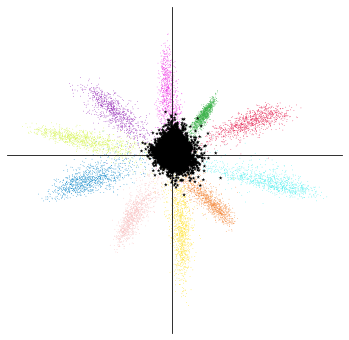

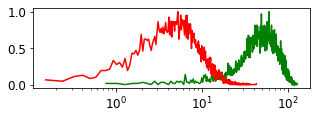

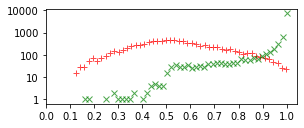

DIR score file saved at LeNet++/DIRs/CIFAR/Multiplying_with_mag_Vanilla_0_CIFAR.txt


In [32]:
vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
analyze(vanilla_lenet_pp,neg=cifar.images,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [33]:
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,neg=cifar.images,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [34]:
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,neg=cifar.images,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

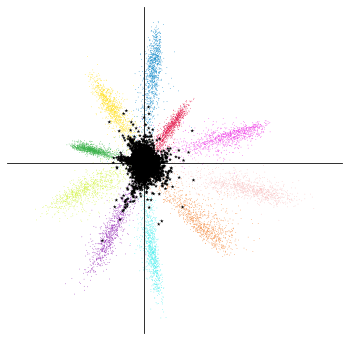

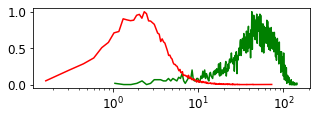

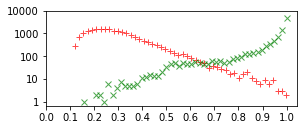

DIR score file saved at LeNet++/DIRs/CIFAR/Multiplying_with_mag_Ring_50.0_0_CIFAR.txt


In [35]:
Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

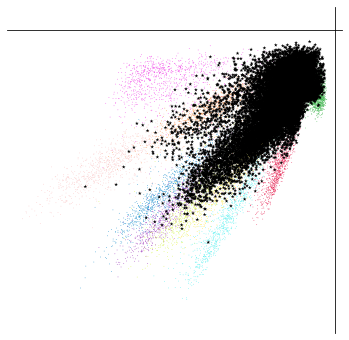

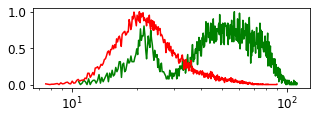

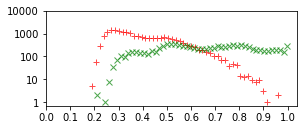

DIR score file saved at LeNet++/DIRs/CIFAR/Multiplying_with_mag_Center_50.0_0_Not_MNIST.txt


In [36]:
Center_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Center_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss, 'CenterLossLayer': CenterLossLayer, 'zero_loss': zero_loss})
#Center_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Center_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no))
analyze2(Center_Loss_Lenet_pp,file_name=dataset_type+'/Center_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}')

In [36]:
#evaluation_plotter(dataset_type,'0')

### Comparision On Known Unknown Letters

In [37]:
#random_model_no='0'
#dataset_type='Letters_Known_Unknowns'
#if not os.path.exists('LeNet++/Final_Plots/'+dataset_type):
#    os.makedirs('LeNet++/Final_Plots/'+dataset_type)
#if not os.path.exists('LeNet++/DIRs/'+dataset_type):
#    os.makedirs('LeNet++/DIRs/'+dataset_type)

In [38]:
#vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
#analyze(vanilla_lenet_pp,neg=letters.X_test,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [39]:
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,neg=letters.X_test,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [40]:
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,neg=letters.X_test,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [41]:
#Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
#analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [42]:
#evaluation_plotter(dataset_type,'0')

### Comparision On Devanagari

Loading Dataset

In [43]:
#hindi=data_prep.hindi_letters()

In [44]:
#random_model_no='0'
#dataset_type='Devanagari'
#if not os.path.exists('LeNet++/Final_Plots/'+dataset_type):
#    os.makedirs('LeNet++/Final_Plots/'+dataset_type)
#if not os.path.exists('LeNet++/DIRs/'+dataset_type):
#    os.makedirs('LeNet++/DIRs/'+dataset_type)

In [45]:
#vanilla_lenet_pp=keras.models.load_model('LeNet++/Models/Vanilla_'+random_model_no+'.h5py')
#analyze(vanilla_lenet_pp,neg=hindi.images,file_name=dataset_type+'/Vanilla_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [46]:
#BG=keras.models.load_model('LeNet++/Models/BG_'+random_model_no+'.h5py')
#analyze(BG,neg=hindi.images,file_name=dataset_type+'/BG_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [47]:
#negative_training_lenet_pp=keras.models.load_model('LeNet++/Models/Cross_'+random_model_no+'.h5py')
#analyze(negative_training_lenet_pp,neg=hindi.images,file_name=dataset_type+'/Cross_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [48]:
#Ring_Loss_Lenet_pp = keras.models.load_model(('LeNet++/Models/Ring_{}_{}.h5py').format(Minimum_mag_for_knowns,random_model_no), custom_objects={'ring_loss': ring_loss})
#analyze(Ring_Loss_Lenet_pp,file_name=dataset_type+'/Ring_'+str(Minimum_mag_for_knowns)+'_'+random_model_no+'_{}.{}',neg_labels=dataset_type)

In [49]:
#evaluation_plotter(dataset_type,'0')